# Le machine learning avec scikit-learn et statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
%matplotlib inline

In [3]:
frameAdv=pd.read_csv("Advertising.csv",index_col=0)

In [4]:
frameAdv

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


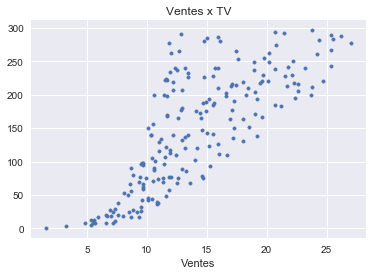

In [5]:
#nuage de points ventes x TV
plt.scatter(frameAdv.Sales,frameAdv.TV,marker=".")
plt.title("Ventes x TV")
plt.xlabel("Ventes")

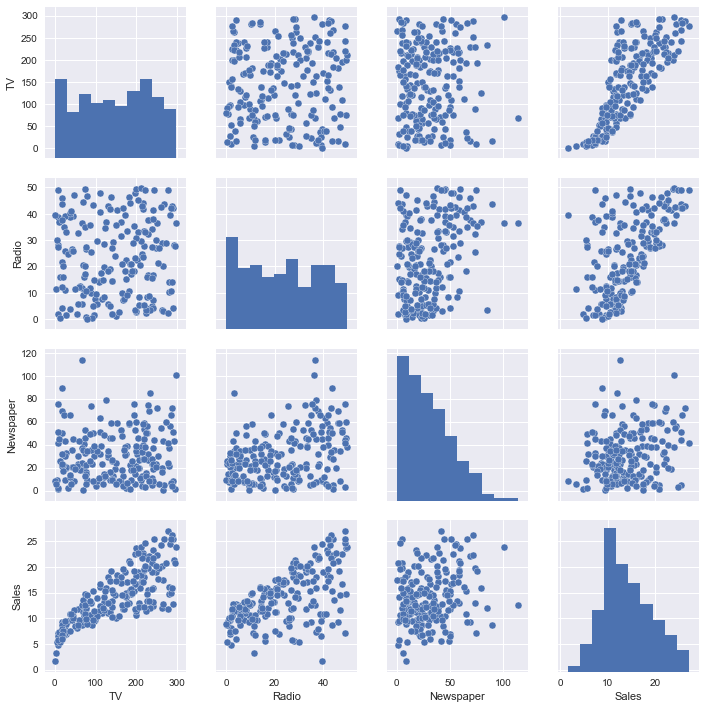

In [6]:
sns.pairplot(frameAdv)

On crée un premier modèle avec Statsmodels pour une régression

In [7]:
#regression lineaire
modeleOLS=smf.ols(formula="Sales~TV+Radio+Newspaper", data=frameAdv).fit()

In [8]:
modeleOLS.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: Sales            AIC:                780.3622
Date:               2017-03-17 09:06 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
TV              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
Radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
Newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
-----------------------------------------------------------------
Omnibus:             60.414       Durbin-Watson:          2.084  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       151.241
Skew:                -1.327       Prob(JB):               0.000  
Kurtosis:            6.332        Condition No.:          454    
=================================================================

"""

In [9]:
#on peut prédire les données à partir du modèle ajusté
modeleOLS.predict(frameAdv[frameAdv.columns[0:3]])

array([ 20.52397441,  12.33785482,  12.30767078,  17.59782951,
        13.18867186,  12.47834763,  11.72975995,  12.12295317,
         3.72734086,  12.55084872,   7.0322992 ,  17.28512918,
        10.57712073,   8.82630048,  18.43436638,  20.81929952,
        12.82365674,  23.22495716,   9.95168206,  14.16607293,
        18.10076728,  14.7405382 ,   6.4891503 ,  16.5459329 ,
         8.14651887,  15.6100386 ,  14.98951429,  17.05167344,
        19.41053803,   9.14402389,  21.6339338 ,  11.3460929 ,
         7.63888314,  18.86426829,   7.57483051,  17.00682618,
        23.40590052,  15.62347779,   9.90868103,  20.44761039,
        16.37766467,  17.2959832 ,  21.59580326,  13.96385684,
         8.88787996,  15.16152314,   8.87338673,  21.7226299 ,
        16.26362018,   8.1681656 ,  12.63121132,   9.33981296,
        20.66297563,  19.94469957,  20.37443008,  21.2926106 ,
         8.52771254,  12.77458802,  21.89805198,  18.13348698,
         5.74215558,  22.89067208,  16.78426073,  13.21

In [10]:
#on prédit une nouvelle donnée
modeleOLS.predict(pd.DataFrame(np.array([50,43,150]).reshape(1,3),columns=["Radio","TV","Newspaper"]))

array([ 14.17764601])

On crée un premier modèle avec scikit-learn pour une régression

In [11]:
#modème linéaire avec scikit-learn
from sklearn.linear_model import LinearRegression

In [12]:
#on crée l'objet
modeleOLS2=LinearRegression()

In [13]:
#on crée X et y
y=frameAdv.Sales
X=frameAdv[["Radio","TV","Newspaper"]]

In [14]:
#on ajuste le modèle
modeleOLS2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
modeleOLS2.coef_

array([ 0.18853002,  0.04576465, -0.00103749])

In [18]:
#on peut prédire une nouvelle valeur
modeleOLS2.predict(np.array([50,43,150]).reshape(1, -1))

array([ 14.17764601])

On cherche maintenant à effectuer de la validation (apprentissage / test)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#apprentissage / test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [22]:
X_train.shape

(180, 3)

In [23]:
modeleOLS3=LinearRegression()

In [24]:
#on ajuste le modèle sur l'échantillon d'apprentissage
modeleOLS3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
#on prédit sur l'échantillon test
y_predict=modeleOLS3.predict(X_test)

In [26]:
#on calcule manuellement le RMSE
RMSE=np.sqrt(((y_predict-y_test)**2).sum())

In [27]:
RMSE

5.6814329268400705

# K-NN

On va appliquer les plus proches voisins sur les données de la NBA pour prédire le nombre de points marqués

In [28]:
frameNBA2=pd.read_csv("nba_2013.csv")

In [29]:
#on élimine les données manquantes
frameNBA2.dropna(inplace=True)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
#on récupère toutes les variables quanti de notre jeu de données
X=frameNBA2[[var for var in frameNBA2.columns if frameNBA2[var].dtypes!=object]]

In [32]:
X=X.drop("season_end",axis=1)
X=X.drop("pts",axis=1)


In [33]:
y=frameNBA2.pts

In [34]:
#apprentissage / test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [35]:
#on crée le modèle avec 5 voisins
modeleKNN=KNeighborsRegressor(n_neighbors=5)

In [36]:
modeleKNN.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [37]:
y_pred=modeleKNN.predict(X_test)

In [38]:
RMSE=np.sqrt(((y_pred-y_test)**2).sum())
RMSE

547.94079972201382

# k-means

On va traiter une image avec les k-means (on veut réduire le nombre de couleurs)

In [39]:
from scipy import misc

In [40]:
image=misc.imread('New York.jpg')

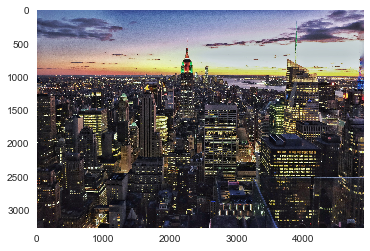

In [41]:
plt.imshow(image)
plt.grid(False)

In [102]:
image.shape

(3264, 4896, 3)

In [104]:
#on transforme l'image de façon à ce qu'elle soit représenté sous la forme d'un tableau de dimension 2
X=image.reshape(-1,3)
X.shape

(15980544, 3)

In [106]:
X=X/255.0

In [108]:
#on fixe le nombre de couleurs à 3
n_colors=3

In [109]:
from sklearn.cluster import KMeans

In [110]:
#on crée le modèle
modelKM=KMeans(n_colors)

In [112]:
#on ajuste le modèle (c'est la partie la plus longue)
labels=modelKM.fit_predict(X)

In [113]:
#on récupère les centroïdes pour recolorer l'image
colors=modelKM.cluster_centers_

In [114]:
#on reconstruit l'image
new_image= colors[labels].reshape(image.shape)
new_image.shape

(3264, 4896, 3)

In [115]:
new_image=(new_image*255.0).astype(np.uint8)

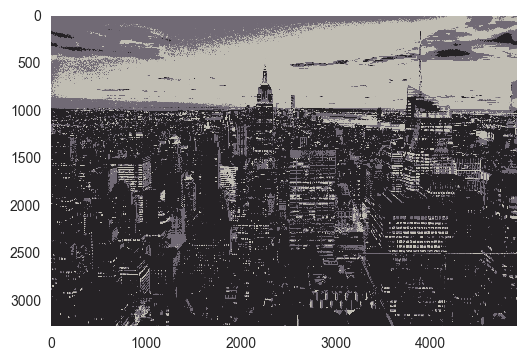

In [117]:
plt.imshow(new_image)
plt.grid(False)